<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/CREDIT_SCORING_USING_LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT SCORING USING LOGISTIC REGRESSION

# Step 1: Setting Up the Environment

In [ ]:
#  Setting Up the Environment
# Ensure Python is installed on your system. You will need several Python libraries, including pandas, NumPy, matplotlib, seaborn, and scikit-learn. Install these libraries using pip:


In [ ]:
# Install required libraries

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

# Step 2: Importing Libraries

In [ ]:
# Importing Libraries
# Import the necessary libraries in your Python script or Jupyter notebook:

In [ ]:
import pandas as pd  # Data manipulation and analysis

In [ ]:
import numpy as np  # Numerical computing

In [ ]:
import matplotlib.pyplot as plt  # Data visualization

In [ ]:
import seaborn as sns  # Data visualization

In [ ]:
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

In [ ]:
from sklearn.linear_model import LogisticRegression  # Logistic regression model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Model evaluation metrics

# data wrangling

In [ ]:
# Load the original dataset

In [ ]:
data = pd.read_csv('german.data', delimiter=' ', header=None)

In [ ]:
# Extract the number of columns from the first row

In [ ]:
num_columns = data.shape[1]

In [ ]:
# Generate column names as indices

In [ ]:
column_names = [f"column{i}" for i in range(num_columns)]

In [ ]:
# Assign column names to the dataset

In [ ]:
data.columns = column_names

In [ ]:
# Save the organized dataset to a CSV file for future use

In [ ]:
data.to_csv('organized_dataset.csv', index=False)

In [ ]:
print("The dataset has been organized and saved as 'organized_dataset.csv'.")

The dataset has been organized and saved as 'organized_dataset.csv'.


# Step 3: Loading the Organized Dataset

In [ ]:
# Load the organized dataset into a DataFrame

In [ ]:
df = pd.read_csv('organized_dataset.csv')

# step 4: Expalanatory Data Analysis

In [ ]:
# Inspect the Data
# We inspect the first few rows, information, and summary statistics of the dataset to understand its structure and characteristics.


In [ ]:
df.head()   # Display the first few rows of the dataset

,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9,...,column11,column12,column13,column14,column15,column16,column17,column18,column19,column20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
df.info()   # Display information about the dataset, such as data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   column0   1000 non-null   object
 1   column1   1000 non-null   int64 
 2   column2   1000 non-null   object
 3   column3   1000 non-null   object
 4   column4   1000 non-null   int64 
 5   column5   1000 non-null   object
 6   column6   1000 non-null   object
 7   column7   1000 non-null   int64 
 8   column8   1000 non-null   object
 9   column9   1000 non-null   object
 10  column10  1000 non-null   int64 
 11  column11  1000 non-null   object
 12  column12  1000 non-null   int64 
 13  column13  1000 non-null   object
 14  column14  1000 non-null   object
 15  column15  1000 non-null   int64 
 16  column16  1000 non-null   object
 17  column17  1000 non-null   int64 
 18  column18  1000 non-null   object
 19  column19  1000 non-null   object
 20  column20  1000 non-null   int64 
dtypes: int64(8), ob

In [ ]:
df.describe()   # Display summary statistics of numerical columns

,column1,column4,column7,column10,column12,column15,column17,column20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [ ]:
# Check for Missing Values
# We check for missing values in the dataset, as missing data can affect the quality of analysis.

In [ ]:
df.isnull().sum()   # Display the count of missing values for each column

column0     0
column1     0
column2     0
column3     0
column4     0
column5     0
column6     0
column7     0
column8     0
column9     0
column10    0
column11    0
column12    0
column13    0
column14    0
column15    0
column16    0
column17    0
column18    0
column19    0
column20    0
dtype: int64

In [ ]:
# Handle Missing Values
# Depending on the nature and amount of missing data, we may fill missing values with the mean or median, or drop rows/columns containing missing values.
# Here, we fill missing values with the mean of each column.

In [ ]:
# df.fillna(df.mean(), inplace=True)

In [ ]:
# Check for Duplicate Values
# Duplicate rows can skew analysis results, so we check for and remove duplicates if present.

In [ ]:
df.duplicated().sum()   # Display the count of duplicate rows

0

In [ ]:
# Remove Duplicate Values
# If duplicates are found, we remove them to ensure data integrity.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Visualize the Data
# Visualizing the data helps in gaining insights and understanding distributions and patterns within the dataset.
# Here, we create histograms with kernel density estimation curves for each numerical column.

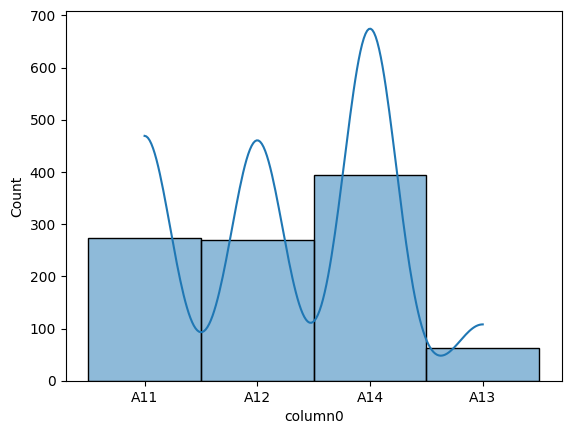

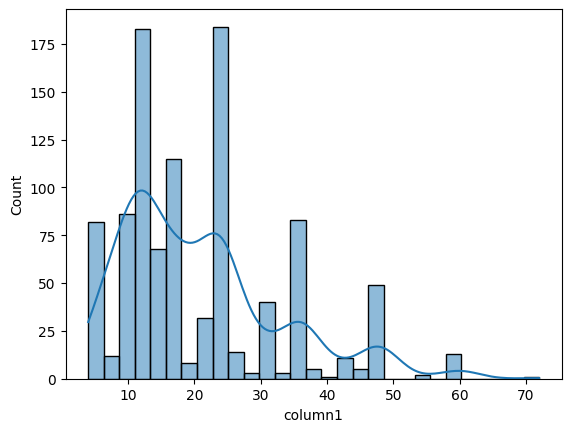

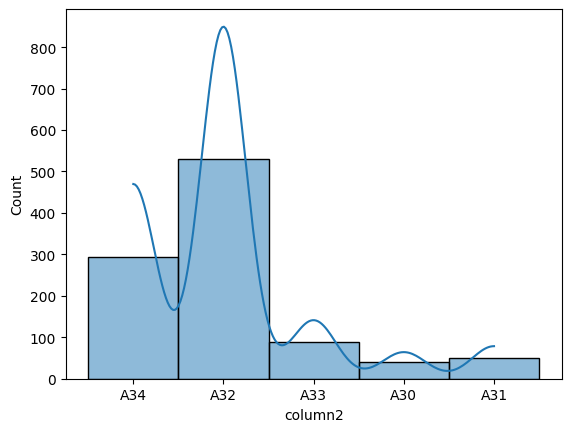

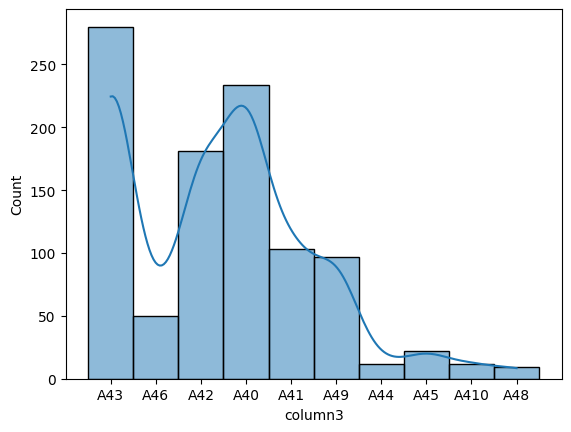

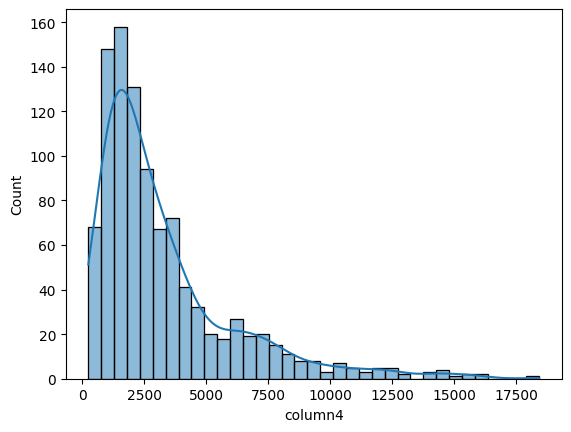

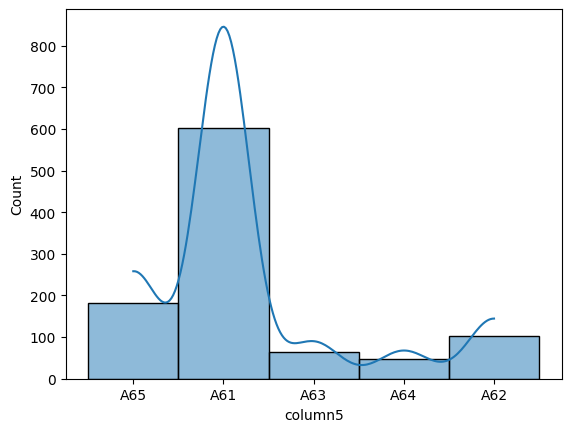

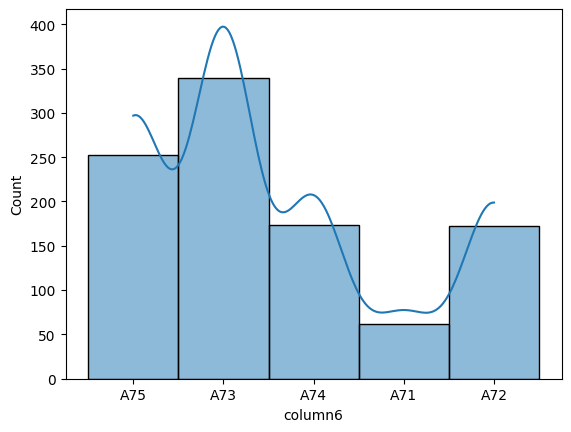

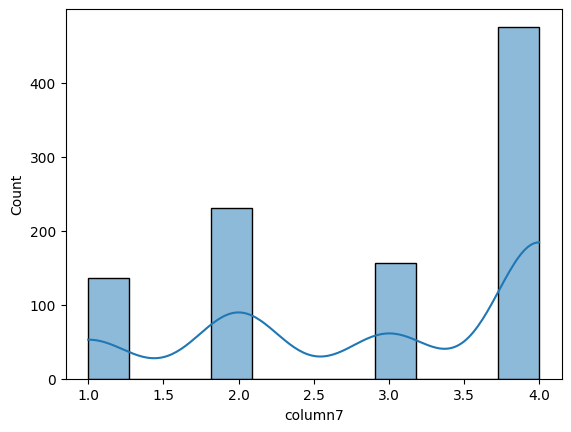

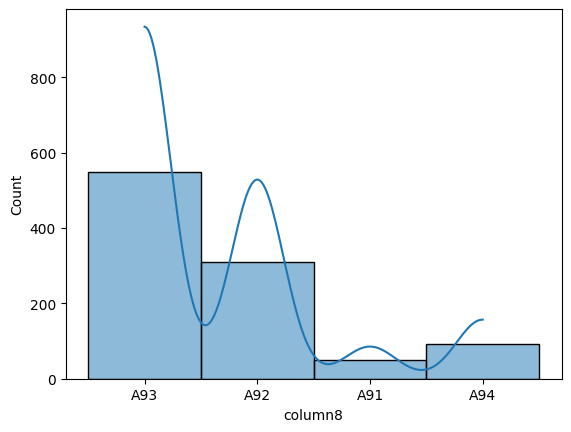

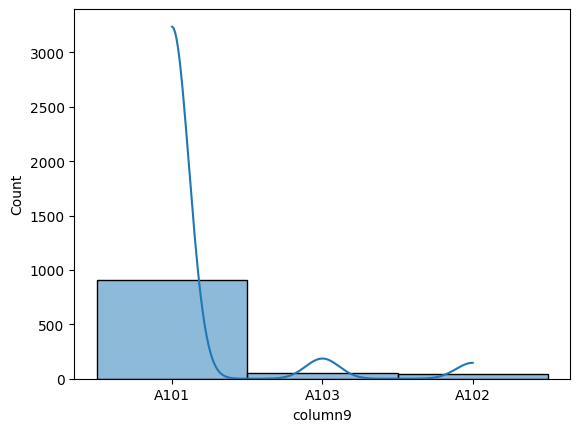

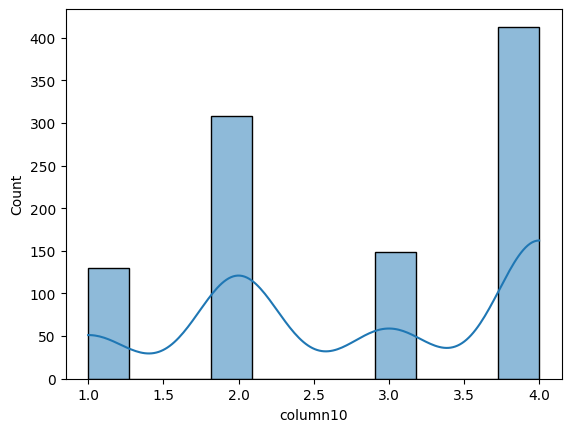

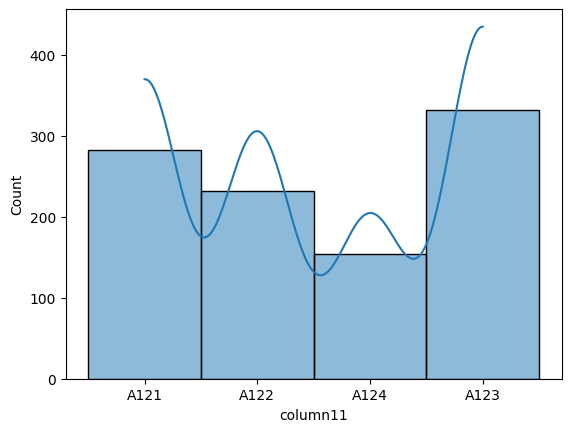

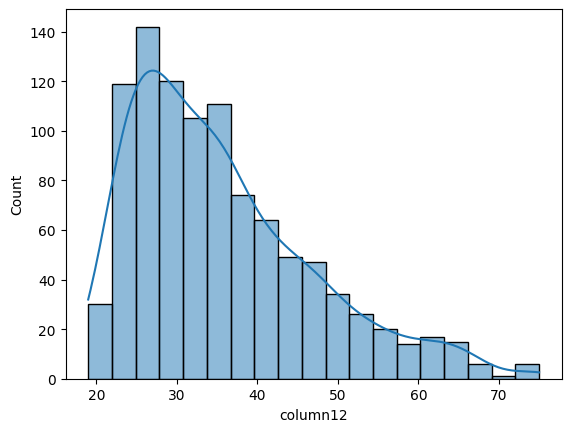

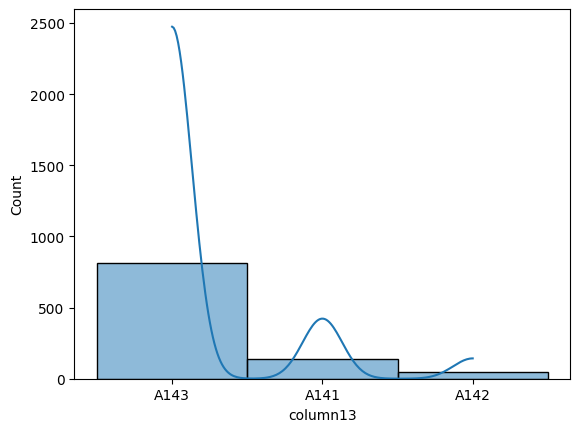

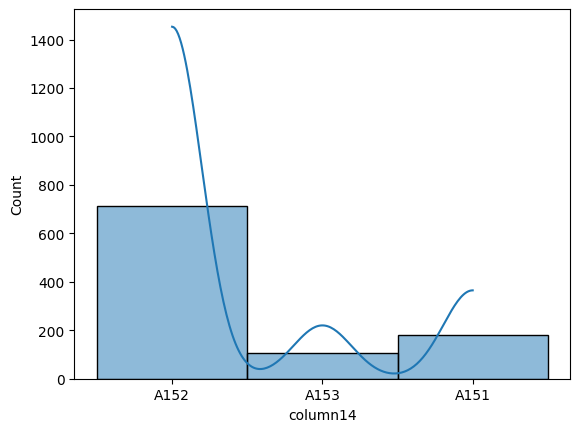

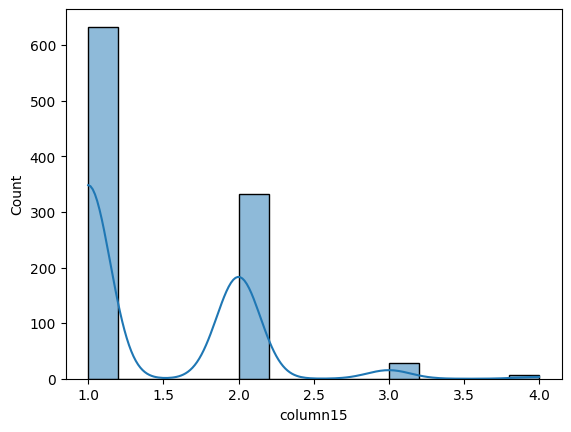

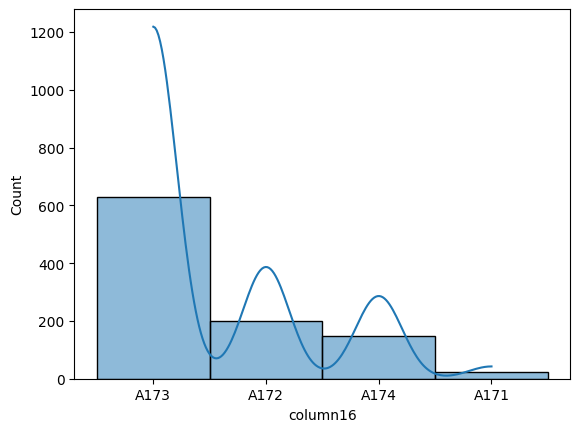

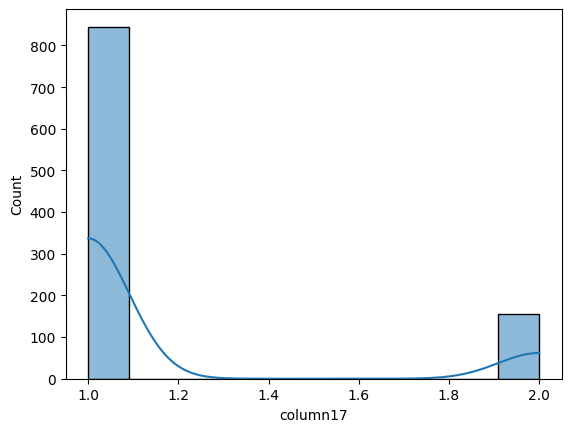

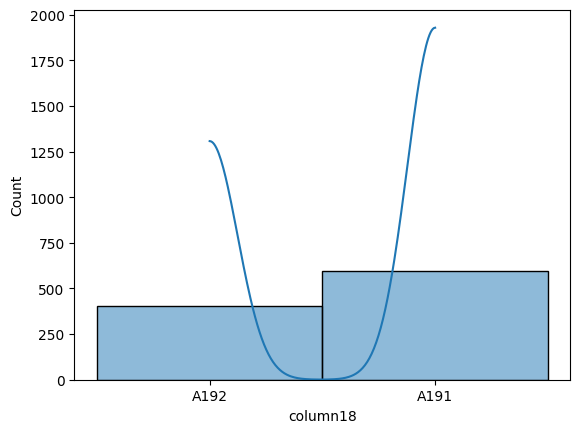

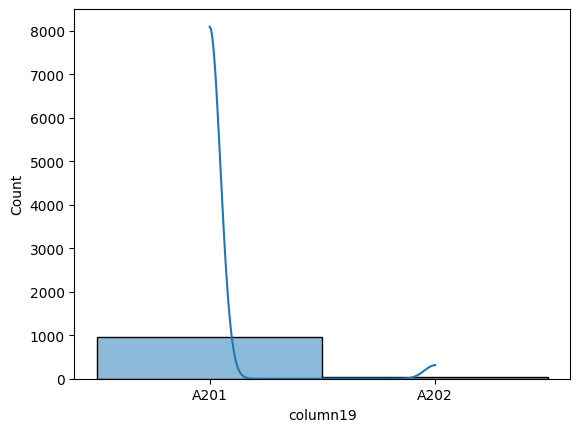

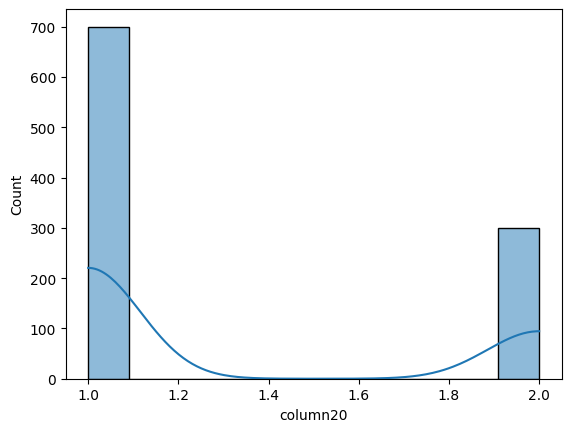

In [ ]:
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.show()

In [ ]:
# Check Data Distribution
# We examine the distribution of data in each column to identify skewness, outliers, or other distribution characteristics.


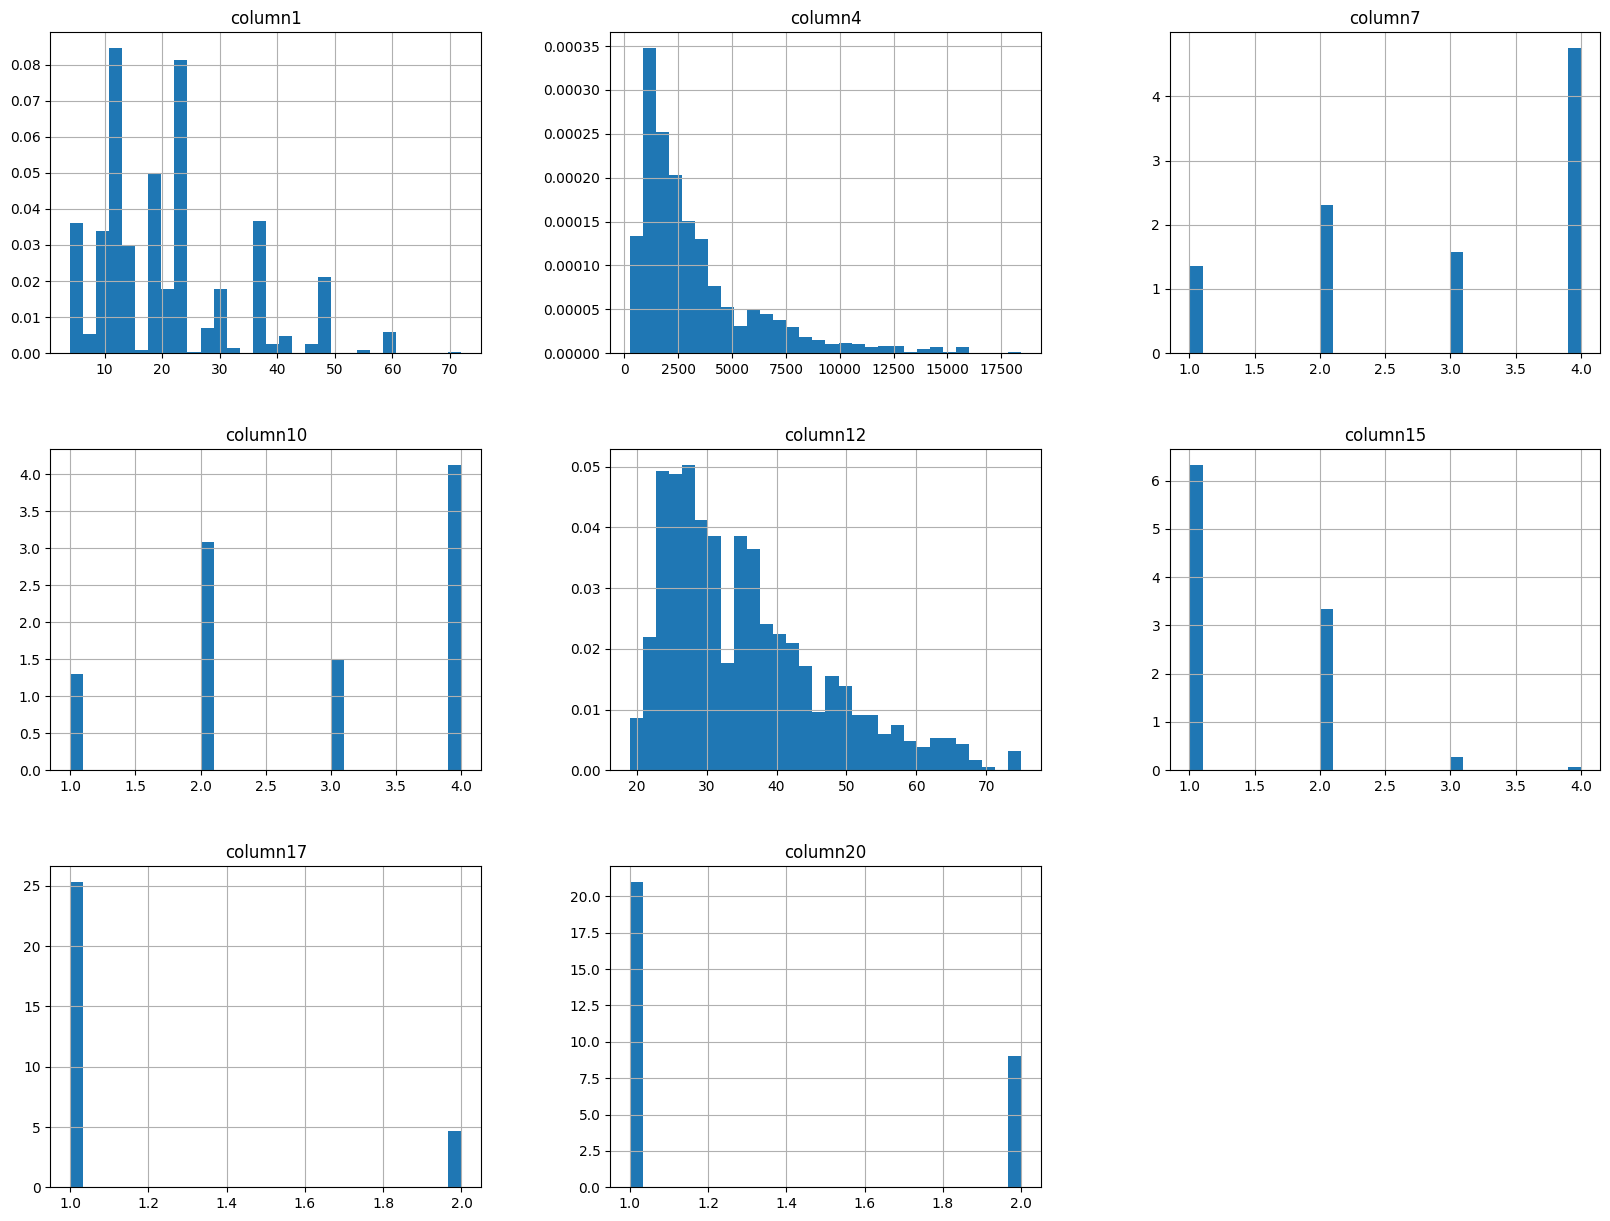

In [ ]:
df.hist(bins=30, figsize=(20,15), density=True)   # Display histograms for each numerical column
plt.show()

In [ ]:

# Check Correlations
# We investigate the correlation between different variables in the dataset to identify relationships and dependencies.
# Here, we visualize the correlation matrix as a heatmap.

In [ ]:
#sns.heatmap(df.corr(), annot=True)   # Display a heatmap of correlation matrix
#plt.show()

In [ ]:
# Handle Categorical Variables
# If the dataset contains categorical variables, we encode them into numerical values using techniques like one-hot encoding.
# This ensures compatibility with machine learning algorithms.

In [ ]:
df = pd.get_dummies(df, drop_first=True)   # Perform one-hot encoding for categorical variables

In [ ]:
# Outlier Detection
# Outliers can significantly impact analysis and statistical models, so we detect and handle them using methods like the IQR score.
# Outliers are data points that significantly deviate from the rest of the data.

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

In [ ]:
Q1 = numeric_df.quantile(0.25)   # Calculate first quartile (25th percentile)

In [ ]:
Q3 = numeric_df.quantile(0.75)   # Calculate third quartile (75th percentile)

In [ ]:
IQR = Q3 - Q1   # Calculate interquartile range (IQR)

In [ ]:
# Remove outliers using IQR method

In [ ]:
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Feature Scaling
# Feature scaling is a crucial preprocessing step in machine learning pipelines, especially when the features in the dataset have different scales. Scaling the features to a standard scale ensures fair comparison and better performance of machine learning algorithms.


In [ ]:
# Import StandardScaler from scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Select only numeric columns for scaling
# We begin by selecting only the numeric columns in the dataset as these are the ones that typically require scaling.

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

In [ ]:
# Initialize StandardScaler object
# Next, we initialize a StandardScaler object from scikit-learn. StandardScaler scales each feature to have a mean of 0 and a standard deviation of 1.


In [ ]:
scaler = StandardScaler()

In [ ]:
# Scale the numeric features
# We then use the fit_transform method of StandardScaler to scale the numeric features in the dataset.

In [ ]:
scaled_features = scaler.fit_transform(numeric_df)

In [ ]:
# Create a DataFrame with scaled features
# After scaling, we create a new DataFrame called scaled_df to store the scaled features, ensuring that the column names are retained.


In [ ]:
scaled_df = pd.DataFrame(scaled_features, columns=numeric_df.columns)

In [ ]:
# Combine scaled numeric features with non-numeric columns
# Since scaling only affects numeric features, we combine the scaled numeric features with the non-numeric columns to ensure that no information is lost.


In [ ]:
for column in df.columns:
    if column not in numeric_df.columns:
        scaled_df[column] = df[column]

In [ ]:

# Reassign the scaled DataFrame to df
# Finally, we reassign the scaled DataFrame back to the original DataFrame variable df for further analysis or modeling.


In [ ]:
df = scaled_df

In [ ]:

# Save the scaled data to a new CSV file
# Optionally, we can save the scaled data to a new CSV file named 'scaled_data.csv' for future reference or use.

In [ ]:
scaled_df.to_csv('scaled_data.csv', index=False)

# Step 5: Data preprocessing

In [ ]:
# Check for missing values
# First, we check for missing values in the dataset. Missing data can adversely affect the quality of analysis and modeling.


In [ ]:
# Load the organized dataset into a DataFrame

In [ ]:
df = pd.read_csv('organized_dataset.csv')

In [ ]:
# Check for missing values
# First, we check for missing values in the dataset. Missing data can adversely affect the quality of analysis and modeling.


In [ ]:
missing_values = df.isnull().sum()

In [ ]:
# Handle missing values by filling them with mean for numerical columns and mode for categorical columns

In [ ]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index
if len(columns_with_missing_values) > 0:
    for column in columns_with_missing_values:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)

In [ ]:
# Encode categorical variables using one-hot encoding
# One-hot encoding is a technique used to convert categorical variables into a numerical format that can be provided to ML algorithms.
# It creates binary columns for each category in the categorical variable.

In [ ]:
df = pd.get_dummies(df, drop_first=True)   # Perform one-hot encoding for categorical variables

In [ ]:
# Normalize features using StandardScaler
# StandardScaler is used to scale numerical features to have a mean of 0 and a standard deviation of 1.
# This helps in improving the performance of ML algorithms, particularly those sensitive to feature scales, like logistic regression.


In [ ]:
scaler = StandardScaler()

In [ ]:
X = df.drop('column20', axis=1)  # Features

In [ ]:
y = df['column20']  # Target variable

In [ ]:
X = scaler.fit_transform(X)

# Step 6: Splitting the Data

In [ ]:

# Split the data into training and testing sets
# This step is crucial for evaluating the model's performance.
# Training set is used to train the model, while the testing set is kept separate for evaluating the model's performance on unseen data.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Training

In [ ]:
# Model Training
# Train a logistic regression model
# Logistic regression is a common algorithm used for binary classification tasks.

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

# step 8: model eveluation

In [ ]:
# Model Evaluation
# Make predictions on the test set
# Predictions are made using the trained model on the test set to evaluate its performance.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Calculate accuracy
# Accuracy is a metric that measures the proportion of correctly classified instances out of the total instances.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.795


# Step 9: Model Fine-Tuning

In [ ]:
# Model Fine-Tuning
# Fine-tune the model using Ridge regression
# Ridge regression is a linear regression technique that adds penalty to the regression coefficients to prevent overfitting.


In [ ]:
model_tuned = Ridge(alpha=0.5)

In [ ]:
model_tuned.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
y_pred_tuned = model_tuned.predict(X_test)

In [ ]:
accuracy_tuned = accuracy_score(y_test, np.round(y_pred_tuned))

In [ ]:
print(f'Accuracy after fine-tuning: {accuracy_tuned}')

Accuracy after fine-tuning: 0.81


## Step 10: Making Predictions

In [ ]:
# Making Predictions
# Example: Predicting a single instance
# Once the model is trained and fine-tuned, it can be used to make predictions on new data instances.
# Here, we demonstrate predicting a single instance by providing its features to the trained model.

In [ ]:
new_data = np.array([X_test[0]])  # Replace with new data

In [ ]:
prediction = model_tuned.predict(new_data)

In [ ]:
print(f'Prediction: {prediction}')

Prediction: [1.44443754]
